This script is used to visualize the spectra before and after applying Molecfit. 
It is particularly useful for inspecting the spectral regions in detail, 
allowing users to select better ranges for the parameters `WAVE_INCLUDE` and 
`WAVE_EXCLUDE`, especially in areas with absorption features that are present 
but not too deep.

These files are located in the folder created by Molecfit:
`reflex_tmp_products/molecfit/ESPRESSO/molecfit_calctrans_1/2024-11-28T21:08:55.907/TELLURIC_DATA.fits`.

### Data Structure:
- **Column 2 TELLURIC_DATA.fits**: Contains the pre-Molecfit data (`raw data`).
- **Column 7 TELLURIC_DATA.fits**: Contains the post-Molecfit data (`corrected data`).

The script processes these files to extract and display the corrected and raw spectra for comparison. 
Key functionalities include plotting the spectra and adapting the visualization dynamically to focus on specific regions.

### Features:
1. Compare raw and corrected spectra side-by-side.
2. Dynamically adjust the wavelength range of the plots based on the inspected data.
3. Highlight absorption regions to aid in the fine-tuning of Molecfit parameters.

### Usage:
1. Ensure that the specified path to the TELLURIC_DATA.fits file is valid.
2. Run the script to visualize the spectra.
3. Inspect the plots to determine the optimal wavelength ranges for Molecfit configuration.

Dependencies:
- Astropy
- Matplotlib
- NumPy

Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits
from astropy.io import fits
import glob

Fits file extraction

In [15]:
#Path
file_path = 'YOUR PATH/reflex_tmp_products/molecfit/SPECTROGRAPH/molecfit_calctrans_1/date/TELLURIC_DATA.fits'
#Open fits file
hdulist = fits.open(file_path) 

Axes

In [16]:
#x axis:
spectrum = hdulist[1].data
numdata = len(spectrum)

#y axis:
lamda = np.zeros(numdata)
for i in range(0,numdata):
    lamda[i] = spectrum[i][1]

Column extraction

In [18]:
#Pre Molecfit
pre_mol = np.zeros(numdata) #[i][2]
for i in range(0,numdata):
    pre_mol[i] = spectrum[i][2]
    
#Post Molecfit
post_mol = np.zeros(numdata) #[i][7]
for i in range(0,numdata):
    post_mol[i] = spectrum[i][7]

Plot

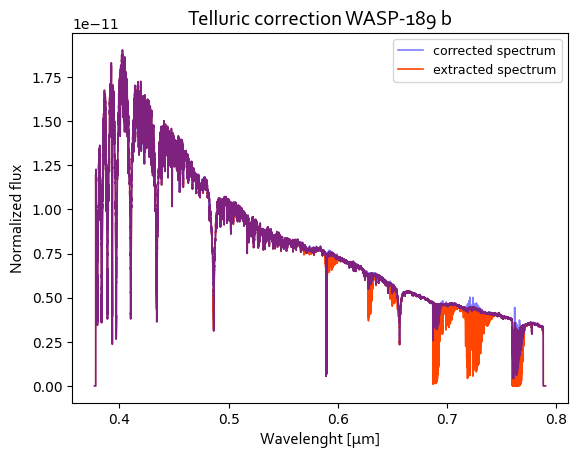

In [19]:
#Colors
fig = plt.figure()
fig.patch.set_facecolor("white") #background color

ax = plt.axes()
ax.patch.set_facecolor("white") #background color
ax.tick_params(axis="x", colors="black") #color values x axis
ax.tick_params(axis="y", colors="black") #color values y axis

#Plot
plt.plot(lamda, post_mol, "blue", alpha = 0.5, zorder= 5, label = "corrected spectrum", linewidth = 1.2) #R1+A2
plt.legend(loc = "lower right", fontsize = 8)

plt.plot(lamda, pre_mol, "orangered", alpha = 1, zorder= 4, label = "extracted spectrum", linewidth = 1.2)
plt.legend(loc = "upper right", fontsize = 9)
plt.title("Telluric correction WASP-189 b", color = "black", fontname="Corbel", size = 15) #título, color del título
plt.xlabel("Wavelenght [μm]", color = "black", fontname="Corbel", size = 12) #eje x, color de la variable
plt.ylabel("Normalized flux", color = "black", fontname="Corbel", size = 12) #eje y, color de la variable

#If you want to look closer:
#plt.xlim(a,b)
#plt.ylim(a,b)

#If you want to plot the parameters WAVE_INCLUDE and WAVE_EXCLUDE:
#ax.axvspan(0.37, 0.55, color='red', alpha=0.3, label='WE 0.37, 0.55') #wave exclude
#ax.axvspan(0.595, 0.694, color='red', alpha=0.3, label='WE 0.595, 0.68') #wave exclude
#ax.axvspan(0.715, 0.7295, color='red', alpha=0.3, label='WE 0.72, 0.725') #wave exclude

#If you want to add wavelenghts of interest:
#example:
#wavelenght1 = 0.5909764 #titanio
#wavelenght2 = 0.6572566 #calcio
#wavelenght3 = 0.6604356 #escandio
#wavelenght4 = 0.621494 #titanio
#x1 = [wavelenght1,wavelenght1]
#y1 = [0,2]
#x2 = [wavelenght2,wavelenght2]
##y2 = [0,2]
##x3 = [wavelenght3,wavelenght3]
#y3 = [0,2]
#x4 = [wavelenght4,wavelenght4]
#y4 = [0,2]

plt.show()